#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#### Import the csv Data as pandas dataframe

In [2]:
df = pd.read_csv('Data/StudentsPerformance.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset Information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

### 3.3 Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check Statistics of data set

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading much higher = 17

### 3.7 Exploring Data

In [10]:
print("Categories in 'gender' variable:   ",end=" ")
print(df['gender'].unique())

print("\nCategories in 'race/ethnicity' variable: ",end=" ")
print(df['race/ethnicity'].unique())

print("\nCategories in 'parental level of education' variable: ",end=" ")
print(df['parental level of education'].unique())

print("\nCategories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())

print("\nCategories in 'test preparation course' variable: ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:    ['female' 'male']

Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' variable:  ['standard' 'free/reduced']

Categories in 'test preparation course' variable:  ['none' 'completed']


In [11]:
# define numerical & categorical columns
numeric_featues = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#printing those columns
print('We have {} numerical features: {}'.format(len(numeric_featues),numeric_featues))
print('\nWe have {} categorical feature: {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']

We have 5 categorical feature: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [12]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adding columns for 'Total Score' and 'Average'

In [13]:
df['Total Score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average Score'] = df['Total Score']/3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [14]:
reading_full = df[df['reading score'] == 100]['Average Score'].count()
maths_full = df[df['math score'] == 100]['Average Score'].count()
writing_full = df[df['writing score'] == 100]['Average Score'].count()

print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Math: {maths_full}')
print(f'Number of students with full marks in Writing: {writing_full}')

Number of students with full marks in Reading: 17
Number of students with full marks in Math: 7
Number of students with full marks in Writing: 14


In [15]:
reading_less_20 = df[df['reading score'] <= 20]['Average Score'].count()
maths_less_20 = df[df['math score'] <= 20]['Average Score'].count()
writing_less_20 = df[df['writing score'] <= 20]['Average Score'].count()

print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in Math: {maths_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')

Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Math: 4
Number of students with less than 20 marks in Writing: 3


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

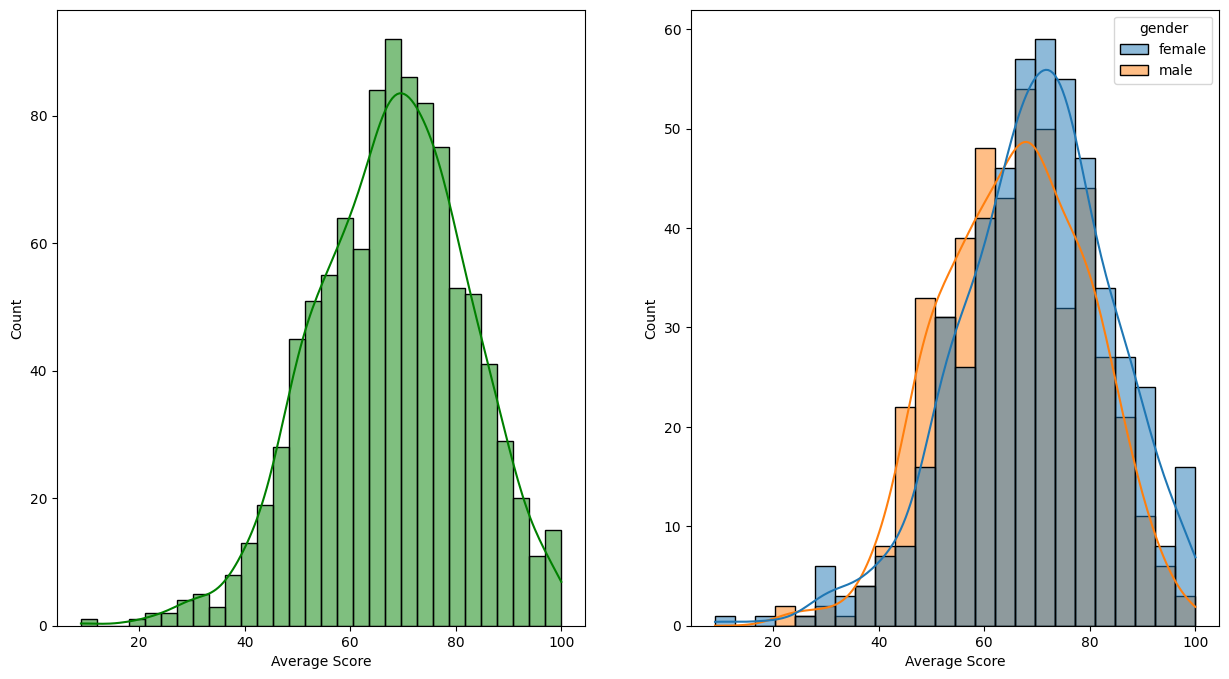

In [16]:
#create a figure and an axis
fig,ax = plt.subplots(1,2, figsize = (15,8))
plt.subplot(121) #Define the first subplot in a 1 row by 2 column grid at position 1
sns.histplot(data= df, x='Average Score',bins=30, kde=True, color= 'g')

plt.subplot(122) #Define the second subplot in the same grid as above but at position 2
sns.histplot(data = df, x='Average Score',kde=True, hue= 'gender') #Adding hue will create separate lines for each gender
plt.show()

  Insights
- Female students tend to perform well then male students.

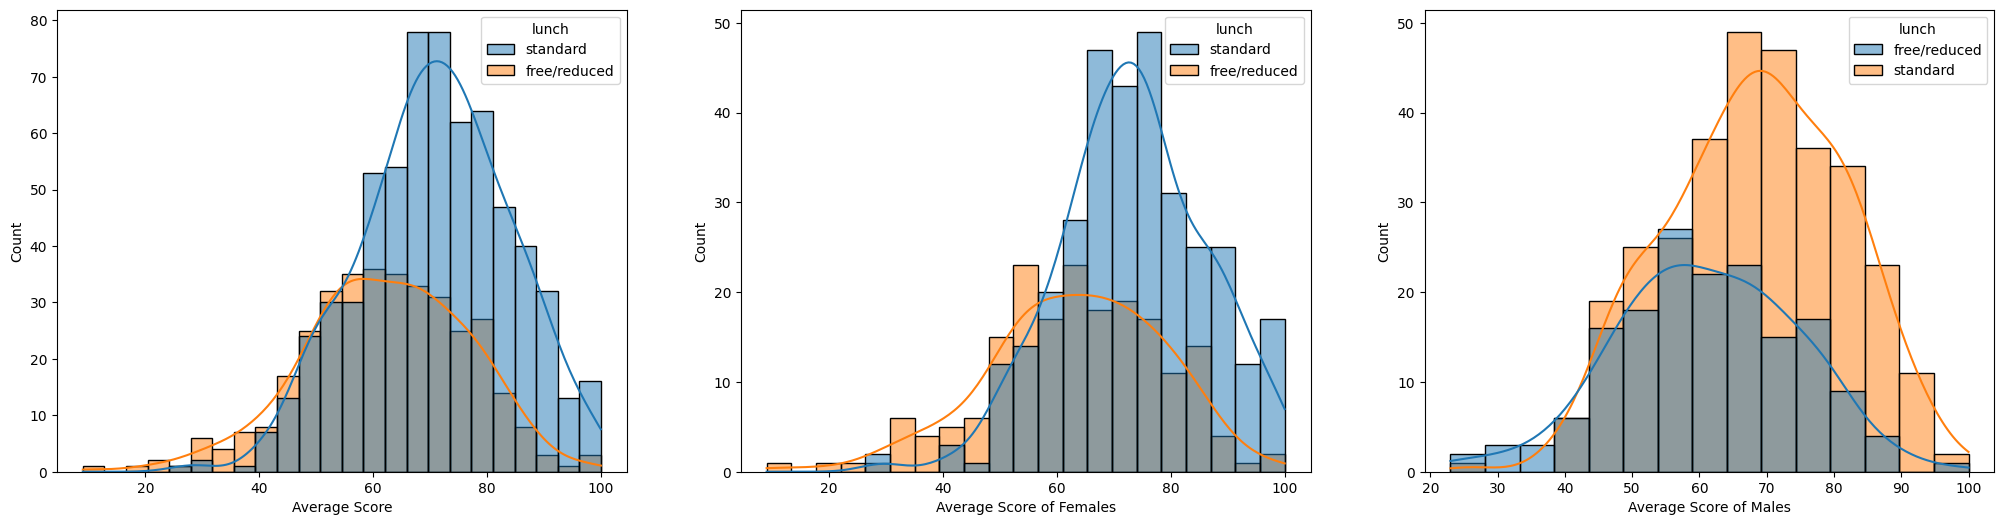

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Average Score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Average Score',kde=True,hue='lunch')
plt.xlabel("Average Score of Females")
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Average Score',kde=True,hue='lunch')
plt.xlabel("Average Score of Males")
plt.show()

Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

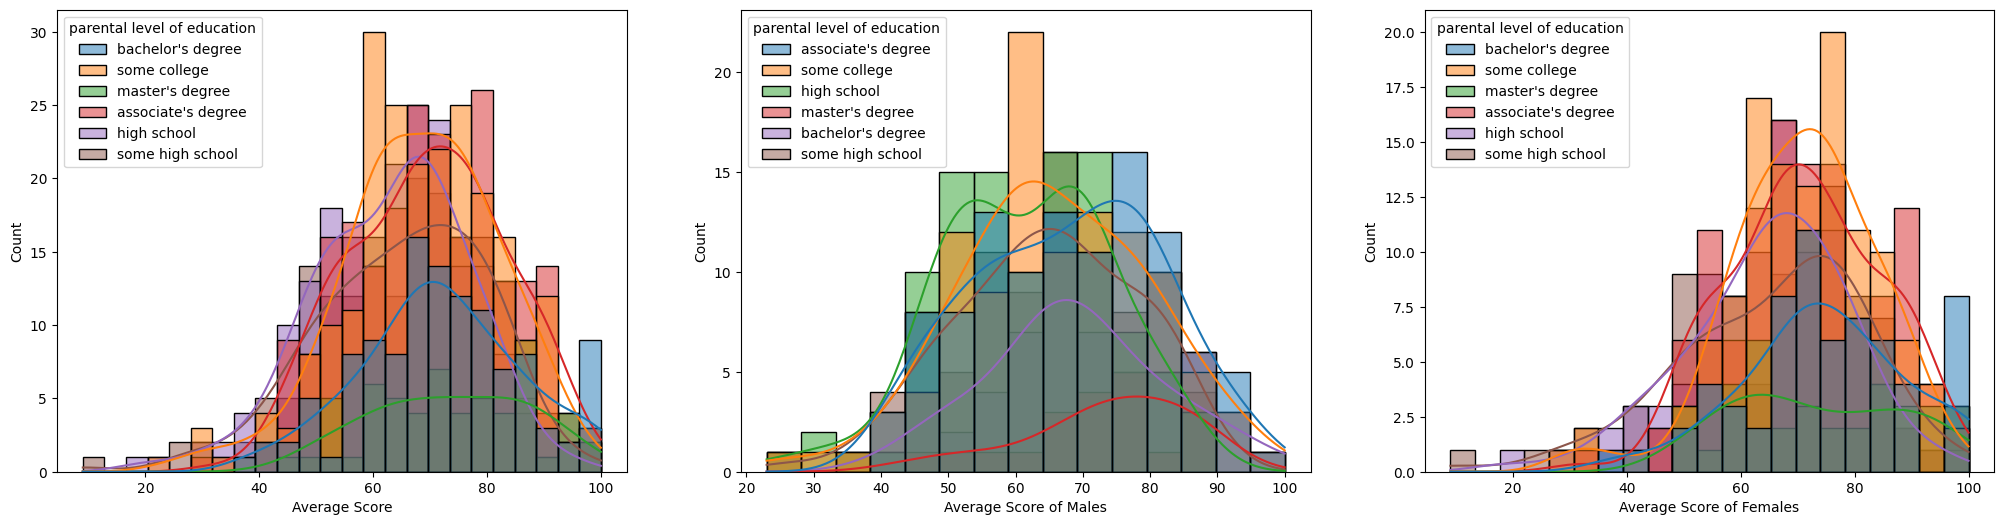

In [18]:
fig,axs = plt.subplots(1,3,figsize= (25,6))
plt.subplot(131)
sns.histplot(data=df, x='Average Score', kde=True, hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='Average Score',kde=True,hue='parental level of education')
plt.xlabel("Average Score of Males")
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='Average Score',kde=True,hue='parental level of education')
plt.xlabel("Average Score of Females")
plt.show()

 Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

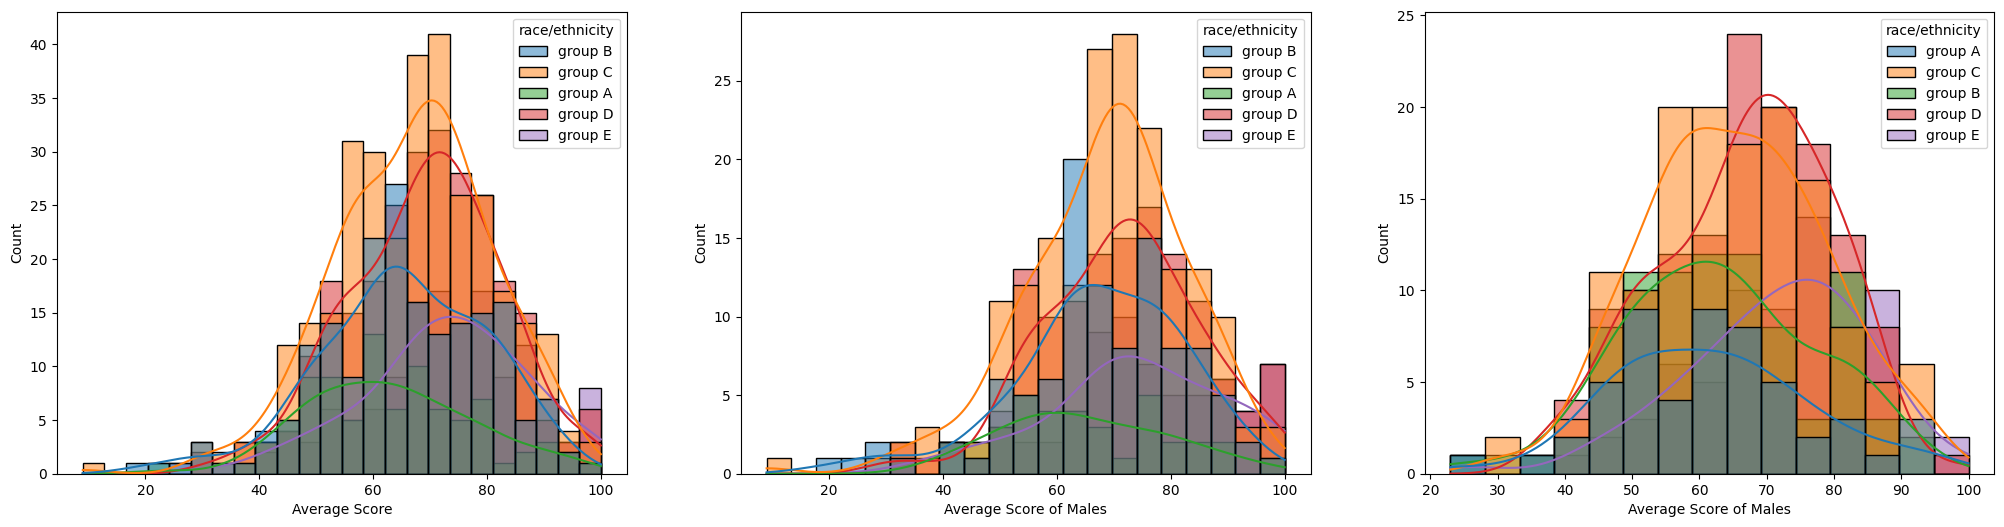

In [19]:
fig,axs = plt.subplots(1,3,figsize= (25,6))
plt.subplot(131)
sns.histplot(data=df, x='Average Score', kde=True, hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='Average Score', kde=True, hue='race/ethnicity' )
plt.xlabel("Average Score of Males")
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='Average Score', kde=True, hue='race/ethnicity' )
plt.xlabel("Average Score of Males")
plt.show()

Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

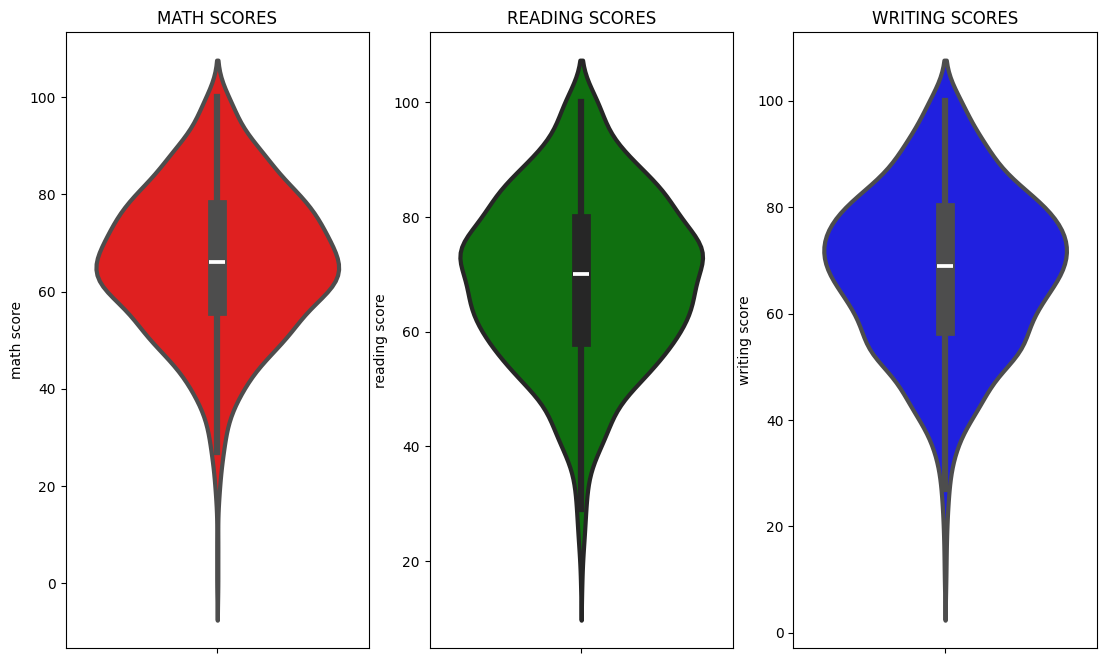

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()